In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [62]:
data = pd.read_csv('data.csv')
data.shape

(150150, 9)

In [63]:
data[['day', 'month', 'year']] = data['week'].str.split('/', expand=True)
data.drop(['week'], axis=1, inplace=True)
data.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [64]:
X , y = data.drop(['units_sold'], axis=1), data['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [65]:
regressor = RandomForestRegressor(n_jobs=-1) # n_jobs=-1 means that use all the processors , = 1 means use only 1 processor , = 2 means use 2 processors and so on ...
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)


0.7506495001983031

In [66]:
y_hat = regressor.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test, y_hat))

RMSE: 31.225245253675453


<Axes: >

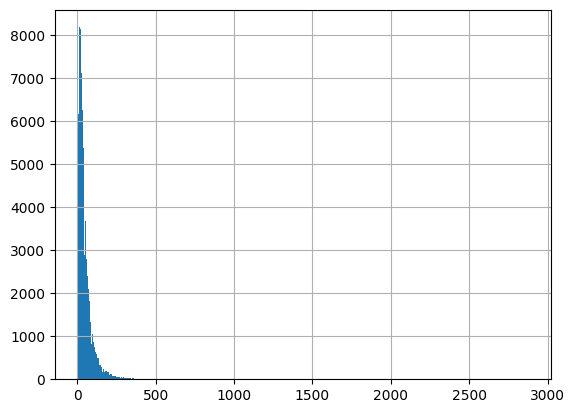

In [67]:
data['units_sold'].hist(bins=1000)

### Emproving the model

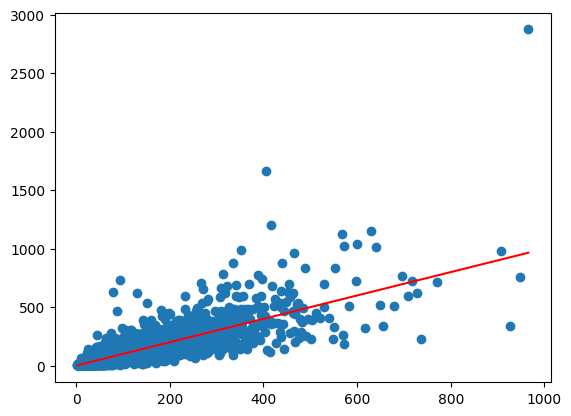

In [68]:
plt.scatter(y_hat , y_test)
plt.plot(np.linspace(y_hat.min(), y_hat.max(), 100), np.linspace(y_hat.min(), y_hat.max(), 100), 'r')
# to  see how  the model is performing , we can plot the predicted values against the actual values ``

array([[<Axes: title={'center': 'record_ID'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'sku_id'}>],
       [<Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'is_featured_sku'}>],
       [<Axes: title={'center': 'is_display_sku'}>,
        <Axes: title={'center': 'units_sold'}>, <Axes: >]], dtype=object)

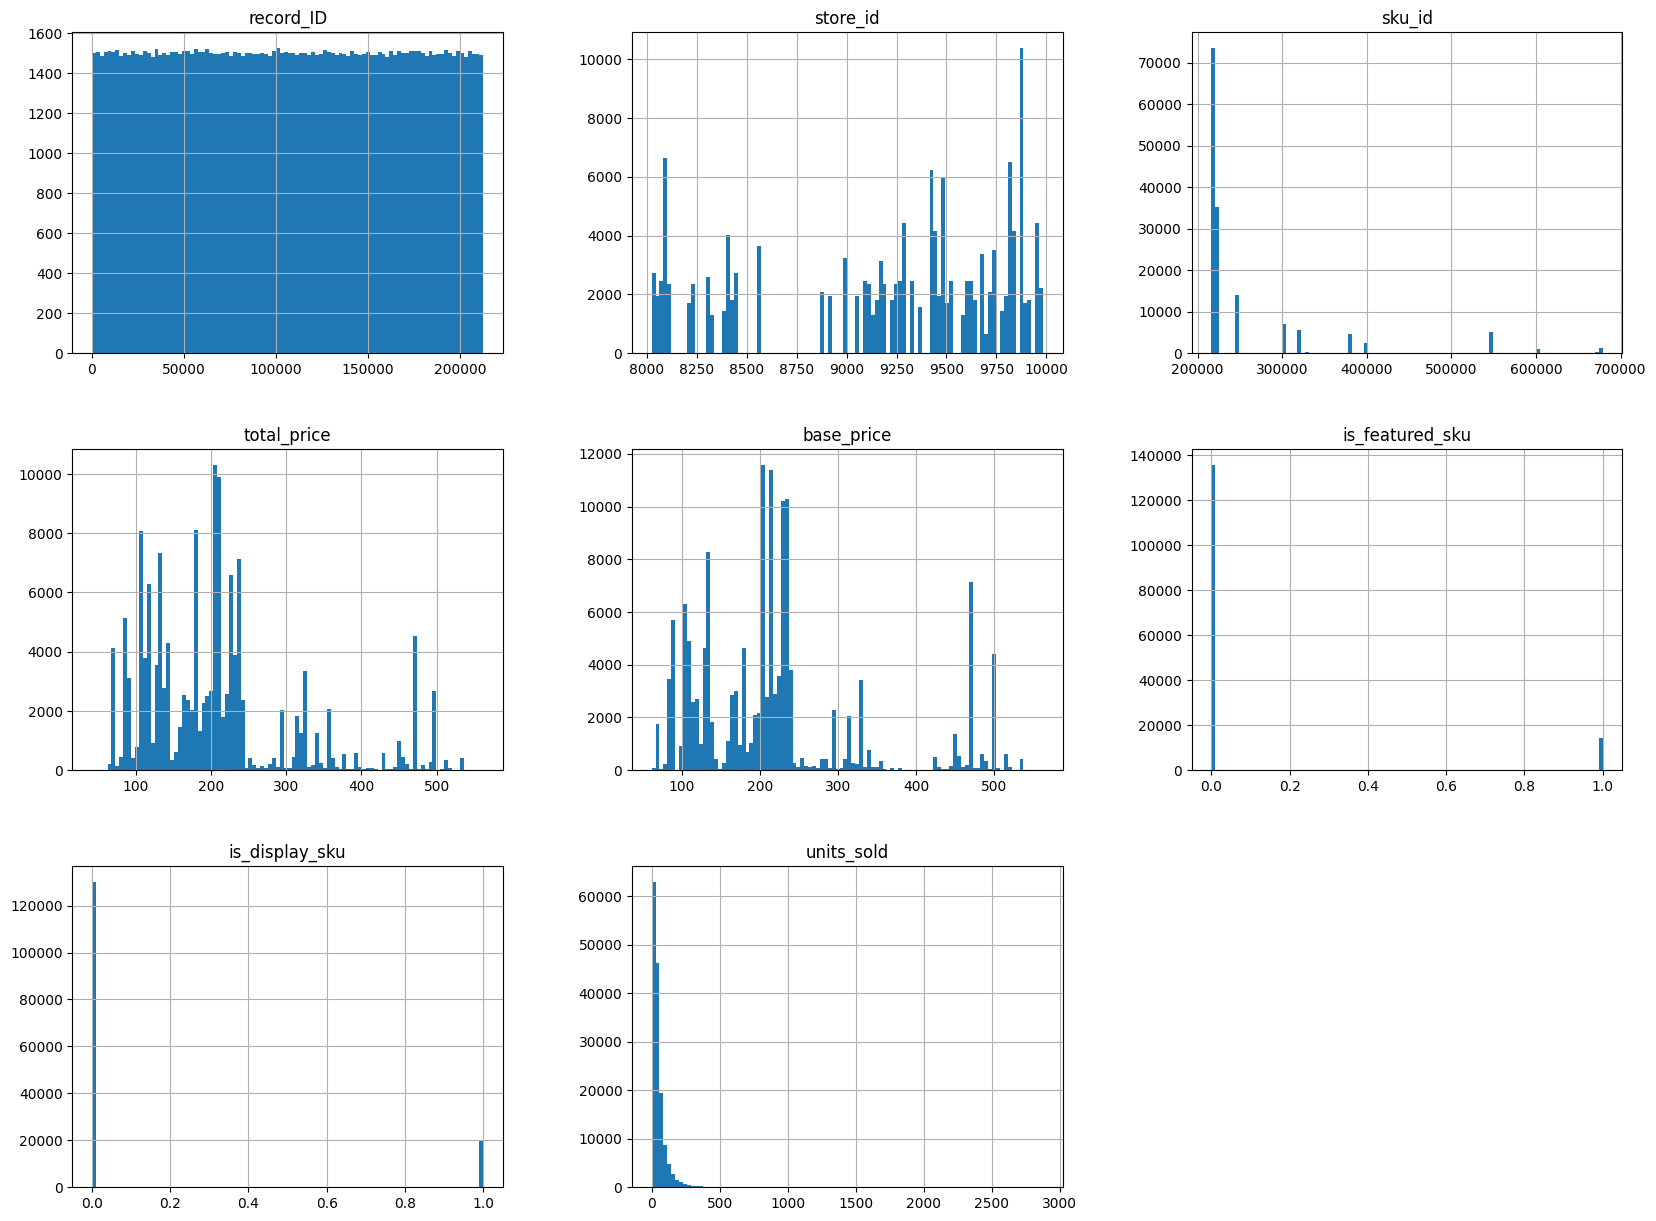

In [69]:
data.hist(bins=100, figsize=(20, 15))
# to see the distribution of the data 
# the  store_id  and the sku_id they  are numerical but they are actually categorical 

In [70]:
data.drop('record_ID', axis=1, inplace=True)

In [71]:
data['store_id'].value_counts().count() # so we have 76 stores that  should be encoded

76

In [72]:
data['sku_id'].value_counts().count() # so we have 28 sku that should be encoded          

28

In [73]:
data['units_sold'].quantile(0.99) # so 99% of the data is less than 283.0
# so we can remove the outliers that are greater than 283.0

283.0

In [74]:
data = data[data['units_sold'] < 283.0]

<Axes: >

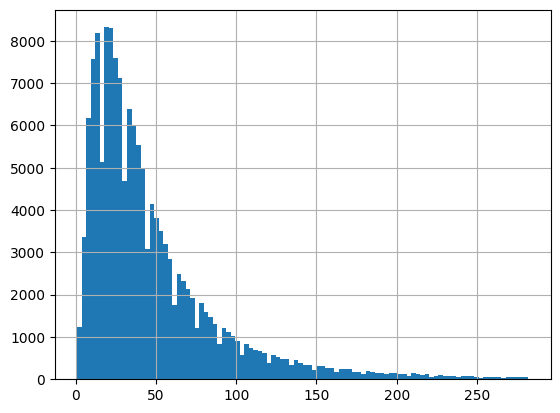

In [75]:
data['units_sold'].hist(bins=100)

In [76]:
data = pd.concat([data, pd.get_dummies(data['store_id'], prefix='store_id' , drop_first=True).astype(int) ,pd.get_dummies(data['sku_id'], prefix='sku_id' , drop_first=True).astype(int)  ], axis=1)
data.drop(['store_id', 'sku_id'], axis=1, inplace=True)

In [77]:
# Scsling the data is  not  necessary for the random forest regressor

In [78]:
X , y = data.drop(['units_sold'], axis=1), data['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



In [79]:
regressor = RandomForestRegressor(n_jobs=-1) # n_jobs=-1 means that use all the processors , = 1 means use only 1 processor , = 2 means use 2 processors and so on ...
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)


0.7735062331193603

In [80]:
y_hat = regressor.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test, y_hat))

RMSE: 20.48318856653574


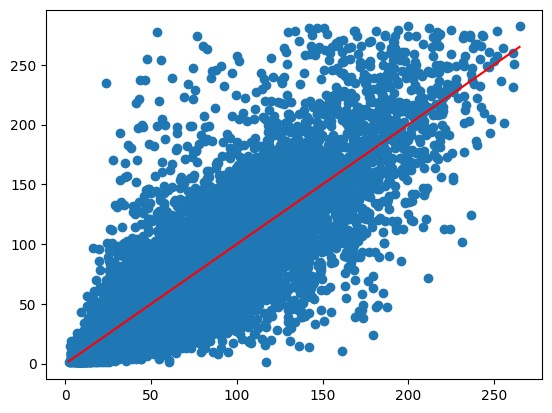

In [81]:
plt.scatter(y_hat , y_test)
plt.plot(np.linspace(y_hat.min(), y_hat.max(), 100), np.linspace(y_hat.min(), y_hat.max(), 100), 'r')
# to  see how  the model is performing , we can plot the predicted values against the actual values ``

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {
          'n_estimators': [ 10, 20], # `n_estimators` is the number of trees in the forest
          'max_depth': [ 20, 50] ,# `max_depth` is the maximum depth of the tree 
          'min_samples_split': [2, 3], # `min_samples_split` is the minimum number of samples required to split an internal node         
          }
best_params =  GridSearchCV(regressor, param_grid, cv=5, n_jobs=-1).fit(X_train, y_train).best_params_
regressor = RandomForestRegressor(**best_params, n_jobs=-1)


In [83]:
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.7711644823732083

In [84]:
best_params

{'max_depth': 50, 'min_samples_split': 3, 'n_estimators': 20}